**Boosting Techniques**

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.

   Boosting is an ensemble learning technique in machine learning that combines multiple weak learners (usually simple decision trees) to create one strong and accurate model.



   **How it improves weak learners:**

   Models are trained sequentially, one after another.

   Each new model focuses more on the samples that were misclassified by the previous models.

   It adjusts the weights of data points — increasing the importance of wrongly predicted samples.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
   
   **AdaBoost (Adaptive Boosting):**

   Focuses on adjusting the weights of training samples after each round.

   Misclassified samples get higher weights, so the next model gives them more attention.

   Final model combines all weak learners with weights based on their accuracy.
  
   **Gradient Boosting:**

   Builds models sequentially to minimize a loss function (like error or log-loss).

   Each new model tries to predict the residual errors (difference between actual and predicted values) of the previous model.

   Uses gradient descent to optimize the overall model performance.

3. How does regularization help in XGBoost?

   n XGBoost, regularization helps to control overfitting and improve model generalization.
   It adds penalty terms to the loss function for model complexity (like too many trees or large leaf weights).

   **Types of regularization used in XGBoost:**

   L1 regularization (Lasso): Makes some feature weights zero — helps in feature selection.

   L2 regularization (Ridge): Reduces large weights — helps in stabilizing the model.


4. Why is CatBoost considered efficient for handling categorical data?

   CatBoost is efficient for categorical (non-numeric) data because it automatically handles categorical features without needing manual encoding like one-hot or label encoding.

   **Reasons:**

   It uses Target Encoding with permutation, which reduces overfitting.

   It converts categorical values into numerical statistics based on target values.

   It handles high-cardinality features (many unique values) efficiently.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?

   Boosting methods are preferred when high accuracy and error reduction are more important than simplicity or speed.

   **Examples:**

   Credit Risk Prediction – To identify loan defaults (e.g., using XGBoost).

   Fraud Detection – Detecting rare fraudulent transactions.

   Customer Churn Prediction – Identifying customers likely to leave.

   



6. Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.9707602339181286


7. Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.7803012822391022


8. Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Model Accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:25] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Model Accuracy: 0.9590643274853801


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:59:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn


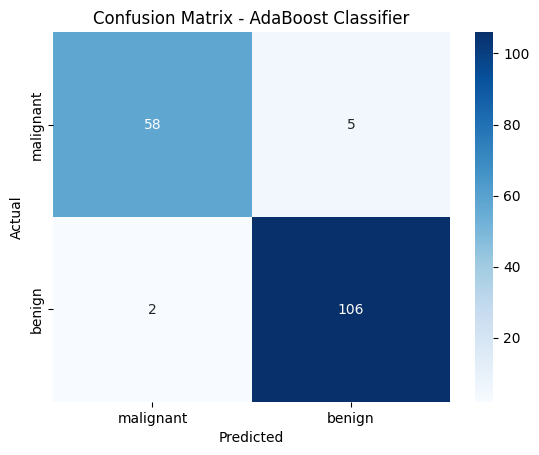

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model


**Answer**

**1. Data Preprocessing:**

Handle missing values – fill numeric with median, categorical with mode or use CatBoost (handles missing automatically).

Convert categorical features – one-hot or label encoding (or CatBoost handles directly).

Deal with imbalance – use class weights, oversampling (SMOTE), or scale_pos_weight.


**2. Choice of Boosting Algorithm:**

CatBoost: best when data has many categorical features.

XGBoost: best for numeric + large datasets.

AdaBoost: simple but less accurate.


**3. Hyperparameter Tuning:**

Use GridSearchCV or RandomizedSearchCV.

Tune learning_rate, n_estimators, max_depth, and regularization parameters.

Apply early stopping to avoid overfitting.

**4. Evaluation Metrics:**

Use Precision, Recall, F1-score, ROC-AUC, and PR-AUC (since data is imbalanced).

Focus on Recall to catch more defaulters and reduce risk.

**5. Business Benefits:**

Detect high-risk customers early → reduce loan losses.

Helps in better risk management and decision-making.

Model explanations (using SHAP) improve trust and transparency.